In [2]:
import Ipynb_importer
from Root_MUSIC import Root_MUSIC
from ESPRIT import ESPRIT
import matplotlib.pyplot as plt
import numpy as np

importing Jupyter notebook from Root_MUSIC.ipynb
importing Jupyter notebook from ESPRIT.ipynb


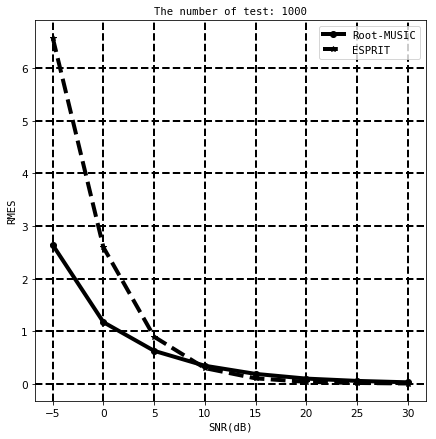

In [3]:
theta_S = np.array([-25, 0, 25])
snapshots = 200
sensorsNum = 8

N = 1000

Root_List = []
ESP_List = []
for SNR in range(-5, 35, 5):
    RMES = 0
    
    for itr in range(N):
        theta_hat = Root_MUSIC(SNR, snapshots, sensorsNum)
        
        res = theta_S - theta_hat
        RMES = RMES + np.sqrt(np.dot(res.T, res)/len(theta_S))
        
    RMES = RMES/N
    Root_List.append(RMES)
    
    RMES = 0
    
    for itr in range(N):
        theta_hat = ESPRIT(SNR, snapshots, sensorsNum)
        
        res = theta_S - theta_hat
        RMES = RMES + np.sqrt(np.dot(res.T, res)/len(theta_S))
        
    RMES = RMES/N
    ESP_List.append(RMES)

Root_List = np.array(Root_List)
ESP_List = np.array(ESP_List)

font = {
    'family': 'monospace',
    'weight': 'normal',
    'size': 10.5,
}
fig = plt.figure(0)
plt.plot(range(-5, 35, 5), Root_List, label='Root-MUSIC', marker='o', linestyle='-', color='k', linewidth=4.0)
plt.hold
plt.plot(range(-5, 35, 5), ESP_List, label='ESPRIT', marker='*', linestyle='--', color='k', linewidth=4.0)
plt.tick_params(labelsize=10.5)
plt.grid(True, linestyle='--', color='k', linewidth=2.0)
plt.legend(prop=font)
plt.xlabel('SNR(dB)', font)
plt.ylabel('RMES', font)
plt.title('The number of test: ' + str(N), font)
fig.set_size_inches(7, 7)
plt.show()
fig.savefig('Root-MUSIC and ESPRIT in different SNR')